## 지하철 상관관계분석

### 데이터 정보
- 지하철 정보: 역사명/ 동/ 호선/ 환승여부/ 역위.경도/ 구군별
- 하행 대기시간/ 상행 대기시간
- 승하차 레벨: 일평균승차/ 일평균하차/ 일평균승하차/ 순위
- 상가: 갯수/ 사용중인 상가/ 비어있는 상가
- 소계 레벨: 소계 레벨/ 1인가구수 레벨/ 업장수 레벨

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

#### 한글 폰트 설정

In [2]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 1. 데이터 불러오기

In [3]:
df = pd.read_csv('data/데이터_합본.csv', index_col=0, encoding='euc-kr')
df.head(5)

,역사명,동별,호선,환승,역위도,역경도,일평균승차,일평균하차,일평균승하차,순위,하행 대기시간,상행 대기시간,상가 갯수,사용중인 상가,비어있는 상가,구군별,소계,1인가구수,업장 수
0,다대포해수욕장,다대1동,1.0,NaN,35.048670,128.964100,4264.0,3497.0,7761.0,69.0,20.0,0.0,2.0,2.0,0.0,사하구,16941.0,6298.0,345.0
1,다대포항,다대1동,1.0,NaN,35.057820,128.971300,2900.0,3321.0,6221.0,80.0,20.0,20.0,1.0,1.0,0.0,사하구,16941.0,6298.0,345.0
2,낫개,다대2동,1.0,NaN,35.065265,128.979873,4104.0,4223.0,8327.0,64.0,20.0,20.0,1.0,1.0,0.0,사하구,12110.0,4651.0,246.0
3,신장림,장림2동,1.0,NaN,35.074433,128.977041,2777.0,2583.0,5360.0,91.0,20.0,20.0,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0
4,장림,장림2동,1.0,NaN,35.081090,128.977500,2854.0,2636.0,5490.0,89.0,20.0,20.0,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0


#### 2. NaN -> 0
- 직접 만든 파일. 결측치만 0으로 채워주면 된다.

In [4]:
df.isnull().sum()

역사명          0
동별           0
호선           2
환승         102
역위도          2
역경도          2
일평균승차        2
일평균하차        2
일평균승하차       2
순위           2
하행 대기시간      2
상행 대기시간      2
상가 갯수       41
사용중인 상가     41
비어있는 상가     41
구군별          8
소계           8
1인가구수        8
업장 수         8
dtype: int64

In [5]:
df = df.fillna(0)
df.isnull().sum()

역사명        0
동별         0
호선         0
환승         0
역위도        0
역경도        0
일평균승차      0
일평균하차      0
일평균승하차     0
순위         0
하행 대기시간    0
상행 대기시간    0
상가 갯수      0
사용중인 상가    0
비어있는 상가    0
구군별        0
소계         0
1인가구수      0
업장 수       0
dtype: int64

In [6]:
df_dr = df.drop(['하행 대기시간','상행 대기시간','역사명','동별','호선','환승','역위도','역경도','구군별'], axis=1)
# '일평균승차 레벨','일평균하차 레벨',
df_dr.head()

,일평균승차,일평균하차,일평균승하차,순위,상가 갯수,사용중인 상가,비어있는 상가,소계,1인가구수,업장 수
0,4264.0,3497.0,7761.0,69.0,2.0,2.0,0.0,16941.0,6298.0,345.0
1,2900.0,3321.0,6221.0,80.0,1.0,1.0,0.0,16941.0,6298.0,345.0
2,4104.0,4223.0,8327.0,64.0,1.0,1.0,0.0,12110.0,4651.0,246.0
3,2777.0,2583.0,5360.0,91.0,1.0,1.0,0.0,11905.0,4165.0,302.0
4,2854.0,2636.0,5490.0,89.0,1.0,1.0,0.0,11905.0,4165.0,302.0


In [7]:
df_dr_corr = df_dr.corr()
df_dr_corr

,일평균승차,일평균하차,일평균승하차,순위,상가 갯수,사용중인 상가,비어있는 상가,소계,1인가구수,업장 수
일평균승차,1.000000,0.994105,0.998411,-0.819905,0.107634,0.118661,0.029375,0.001187,0.150410,0.626947
일평균하차,0.994105,1.000000,0.998635,-0.795300,0.097593,0.105239,0.034971,-0.011098,0.141849,0.644966
일평균승하차,0.998411,0.998635,1.000000,-0.808326,0.102574,0.111860,0.032327,-0.005196,0.146182,0.637238
순위,-0.819905,-0.795300,-0.808326,1.000000,-0.216614,-0.229374,-0.092535,-0.112583,-0.195062,-0.456119
상가 갯수,0.107634,0.097593,0.102574,-0.216614,1.000000,0.979887,0.707169,0.001719,0.077471,0.087036
사용중인 상가,0.118661,0.105239,0.111860,-0.229374,0.979887,1.000000,0.551851,-0.012157,0.053825,0.092472
비어있는 상가,0.029375,0.034971,0.032327,-0.092535,0.707169,0.551851,1.000000,0.050258,0.133042,0.036087
소계,0.001187,-0.011098,-0.005196,-0.112583,0.001719,-0.012157,0.050258,1.000000,0.866092,0.180357
1인가구수,0.150410,0.141849,0.146182,-0.195062,0.077471,0.053825,0.133042,0.866092,1.000000,0.214306
업장 수,0.626947,0.644966,0.637238,-0.456119,0.087036,0.092472,0.036087,0.180357,0.214306,1.000000


plt.figure(figsize = (15,15)) : 표 사이즈 = 15x15

- 내부 속성
    - annot(annotation): 각 셀의 값 표시 여부 (True=표시) 
    - fmt annot=True 일 때, 숫자 표시 ('.2f' : 소수 두번째자리까지 표시)
    - cmap : 색상 선택
- <a href='https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221205309816'>참고</a>

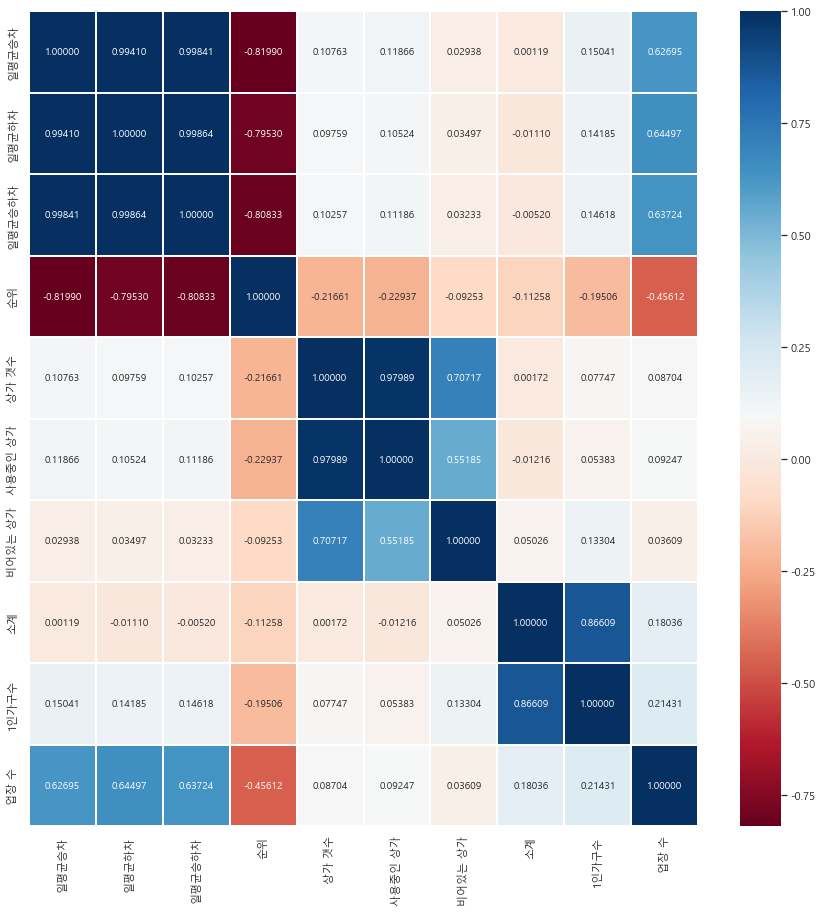

In [9]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()